In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
df=pd.read_csv('churn.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
X=df.iloc[:,3:]
y=df.iloc[:,-1]
X.drop(columns=['Exited'],inplace=True)

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
data=oh.fit_transform(df['Geography'].values.reshape(-1, 1))
df_1 = pd.DataFrame(data.toarray(), columns=oh.get_feature_names_out(['Geography']))
X = pd.concat([df_1, X], axis=1)

In [ ]:
X.drop(columns=['Geography'],inplace=True)

In [ ]:
X['Gender']= df['Gender'].map({'Female': 1, 'Male': 0})

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.00280393, -0.57873591,  1.74273971, ..., -1.54776799,
         0.97024255,  0.21653375],
       [ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.99720391, -0.57873591, -0.57380915, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-1.00280393,  1.72790383, -0.57380915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 0.99720391, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score

# ANN MODEL

In [ ]:
clf = Sequential()
clf.add(Dense(units=10, kernel_initializer = "he_normal", activation = "tanh", input_dim = 12))
clf.add(Dense(units=10, kernel_initializer = "he_normal", activation = "relu"))
clf.add(Dense(units=1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))

clf.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

history = model = clf.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 30)

Epoch 1/30
536/536 [==============================] - 2s 3ms/step - loss: 0.5339 - accuracy: 0.7274 - val_loss: 0.4573 - val_accuracy: 0.7864
Epoch 2/30
536/536 [==============================] - 2s 3ms/step - loss: 0.4416 - accuracy: 0.7960 - val_loss: 0.4402 - val_accuracy: 0.7948
Epoch 3/30
536/536 [==============================] - 2s 3ms/step - loss: 0.4276 - accuracy: 0.8028 - val_loss: 0.4317 - val_accuracy: 0.8084
Epoch 4/30
536/536 [==============================] - 2s 4ms/step - loss: 0.4177 - accuracy: 0.8117 - val_loss: 0.4208 - val_accuracy: 0.8198
Epoch 5/30
536/536 [==============================] - 1s 3ms/step - loss: 0.4072 - accuracy: 0.8190 - val_loss: 0.4108 - val_accuracy: 0.8289
Epoch 6/30
536/536 [==============================] - 1s 3ms/step - loss: 0.3953 - accuracy: 0.8289 - val_loss: 0.3994 - val_accuracy: 0.8357
Epoch 7/30
536/536 [==============================] - 2s 3ms/step - loss: 0.3830 - accuracy: 0.8373 - val_loss: 0.3890 - val_accuracy: 0.8402
Epoch 

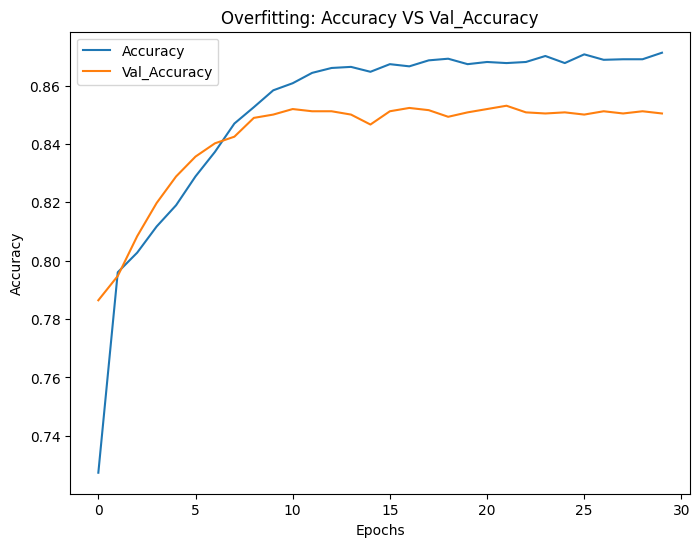

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(model.history["accuracy"],label = "Accuracy")
plt.plot(model.history["val_accuracy"],label = "Val_Accuracy")
plt.legend()
plt.title("Overfitting: Accuracy VS Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
def build_model(hp):
    model = Sequential()
    count = 0

    for i in range(hp.Int("num_layers", min_value=1, max_value=10)):

        if count == 0:
            model.add(Dense(
                hp.Int("units" + str(i), min_value=8, max_value=128, step=8),
                activation=hp.Choice("activation" + str(i), values=["relu", "tanh", "sigmoid"]),
                input_dim=12
            ))
            model.add(BatchNormalization())
            model.add(Dropout(hp.Choice("dropout" + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        else:
            model.add(Dense(
                hp.Int("units" + str(i), min_value=8, max_value=128, step=8),
                activation=hp.Choice("activation" + str(i), values=["relu", "tanh", "sigmoid"])
            ))
            model.add(BatchNormalization())
            model.add(Dropout(hp.Choice("dropout" + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

        count += 1

    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.get(hp.Choice("optimizer", values=["rmsprop", "adam", "sgd", "nadam", "adadelta"])),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [31]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


In [33]:
from kerastuner import RandomSearch

<ipython-input-33-7efa24979c35>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [34]:
tuner = RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 5,
    executions_per_trial = 3,
    directory = "mydir",
    project_name = "Fine_Tune1"
)

In [35]:
tuner.search(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

Trial 5 Complete [00h 01m 14s]
val_accuracy: 0.8034999966621399

Best val_accuracy So Far: 0.8546666701634725
Total elapsed time: 00h 04m 30s


In [36]:
tuner.get_best_hyperparameters()[0].values
model = tuner.get_best_models(num_models = 1)[0]
callback = EarlyStopping(monitor="val_accuracy",
                        min_delta=0.00001,
                        patience=10,
                        verbose=1,
                        mode="auto",
                        baseline=None,
                        restore_best_weights=False)
history = model.fit(X_train,y_train,epochs = 500, initial_epoch= 5, validation_data=(X_test,y_test),callbacks=callback)

Epoch 6/500
250/250 [==============================] - 3s 5ms/step - loss: 0.3899 - accuracy: 0.8344 - val_loss: 0.3489 - val_accuracy: 0.8580
Epoch 7/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3928 - accuracy: 0.8340 - val_loss: 0.3488 - val_accuracy: 0.8600
Epoch 8/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3904 - accuracy: 0.8338 - val_loss: 0.3475 - val_accuracy: 0.8550
Epoch 9/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3878 - accuracy: 0.8344 - val_loss: 0.3483 - val_accuracy: 0.8565
Epoch 10/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3870 - accuracy: 0.8359 - val_loss: 0.3465 - val_accuracy: 0.8600
Epoch 11/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3857 - accuracy: 0.8390 - val_loss: 0.3452 - val_accuracy: 0.8605
Epoch 12/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3764 - accuracy: 0.8400 - val_loss: 0.3443 - val_accuracy: 0.8